In [1]:
# ライブラリのインポート
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

In [2]:
# ワインデータのダウンロード
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 特徴量と正解ラベルを訓練データとテストデータに分割
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# 特徴量の標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std =sc.transform(X_test)

# 特徴量は13個
X_train_std.shape,  X_test_std.shape

((142, 13), (36, 13))

In [3]:
from sklearn.decomposition import PCA
# 削除後の次元を2に指定し、主成分分析を実行
PCA = PCA(n_components=2)
# 訓練データで主成分分析のモデル作成
X_train_pca = PCA.fit_transform(X_train_std)
# 訓練データで作成したモデルでテストデータを主成分分析
X_test_pca = PCA.transform(X_test_std)

In [4]:
# 第2主成分までの主成分分析の結果
print("固有値")
print(PCA.explained_variance_) 
print("因子寄与率")
print(PCA.explained_variance_ratio_)

固有値
[4.82894083 2.52920254]
因子寄与率
[0.36884109 0.19318394]


In [5]:
print("固有ベクトルの形状")
print(PCA.components_.shape)
print('')
print("固有ベクトル")
print(PCA.components_)

固有ベクトルの形状
(2, 13)

固有ベクトル
[[ 0.12959991 -0.24464064 -0.01018912 -0.24051579  0.12649451  0.38944115
   0.42757808 -0.30505669  0.30775255 -0.11027186  0.30710508  0.37636185
   0.2811085 ]
 [-0.49807323 -0.23168482 -0.31496874  0.02321825 -0.25841951 -0.1006849
  -0.02097952 -0.0399057  -0.06746036 -0.53087111  0.27161729  0.16071181
  -0.36547344]]


In [6]:
# 特徴量は2個
X_train_pca.shape, X_test_pca.shape

((142, 2), (36, 2))

In [7]:
print('先頭5件の削除後の特徴量') 
print(X_train_pca[:5])

先頭5件の削除後の特徴量
[[-2.17884511 -1.07218467]
 [-1.80819239  1.57822344]
 [ 1.09829474  2.22124345]
 [-2.55584748 -1.66210369]
 [ 1.85698063  0.24157317]]


In [8]:
# ロジスティック回帰モデルを作成
model = LogisticRegression( multi_class='ovr', max_iter=100, solver='liblinear', penalty='l2', random_state=0)

# モデルの訓練
model.fit(X_train_pca, y_train)

# テストデータで正解率を計算
y_test_pred = model.predict(X_test_pca)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率 = %.2f' % (ac_score))

正解率 = 0.97


<Axes: >

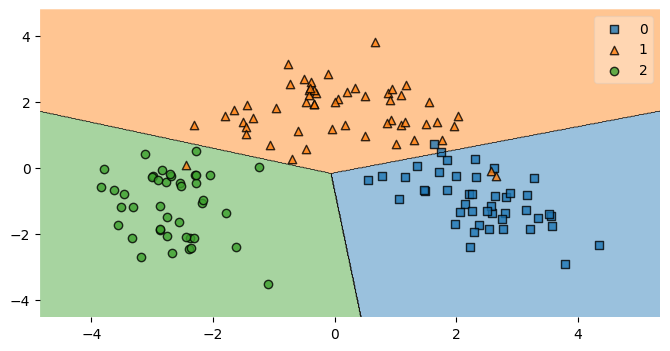

In [9]:
# 訓練データのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_train_pca, y_train, model)

<Axes: >

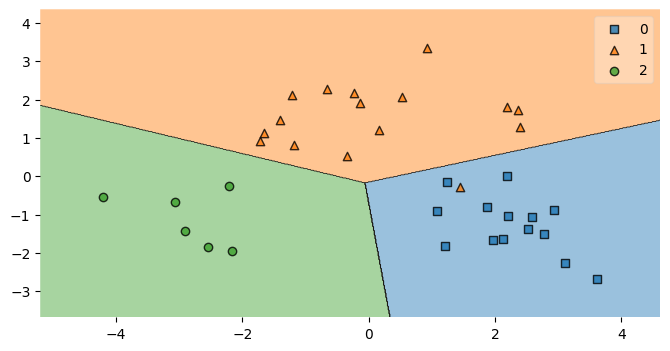

In [10]:
# テストデータのプロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plot_decision_regions(X_test_pca, y_test, model) 

In [11]:
from sklearn.decomposition import PCA
# 削除後の次元を指定しないで、主成分分析を実行
PCA2 = PCA(n_components=None)
X_train_pca2 = PCA2.fit_transform(X_train_std)

In [12]:
# 全ての固有値の主成分分析の結果
print("固有値")
print(PCA2.explained_variance_)
print("因子寄与率")
print(PCA2.explained_variance_ratio_)

固有値
[4.82894083 2.52920254 1.40778607 0.97170248 0.81772614 0.64269609
 0.53904343 0.32677915 0.30227988 0.24405475 0.22672631 0.16401706
 0.09124383]
因子寄与率
[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


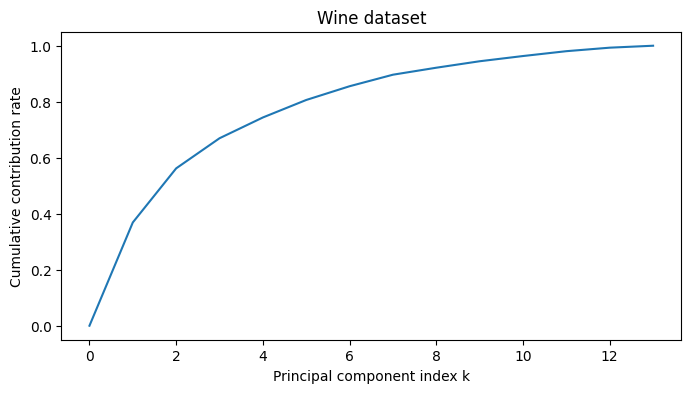

In [13]:
# 次元数と累積寄与率
ratio = PCA2.explained_variance_ratio_
ratio = np.hstack([0, ratio.cumsum()])

plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.plot(ratio)
plt.ylabel('Cumulative contribution rate')
plt.xlabel('Principal component index k')
plt.title('Wine dataset')

plt.show()

In [14]:
from sklearn.decomposition import PCA
# 累積寄与率を指定して、主成分分析を実行
PCA3 = PCA(n_components=0.8)
X_train_pca3 = PCA3.fit_transform(X_train_std)

# 指定した累積寄与率を超えるよう主成分分析した結果
print("固有値")
print(PCA3.explained_variance_)
print("因子寄与率")
print(PCA3.explained_variance_ratio_)

固有値
[4.82894083 2.52920254 1.40778607 0.97170248 0.81772614]
因子寄与率
[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904]
